# Challenge 3

In [26]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [38]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [39]:
#your code here


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [30]:
# your code her
titanic = plt.style.use('classic')
titanic = sns.set_style('whitegrid')
titanic = plt.rcParams['figure.figsize'] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

array([-9.66364250e-01, -7.04684495e-01,  3.55095462e-01, -7.07485610e-01,
       -1.08463556e+00,  1.47835312e+00, -8.61889106e-01,  7.45691840e-01,
        6.22562745e-01,  1.02773172e-01,  1.43671686e+00,  1.99260055e+00,
        7.18963387e-01, -6.31736701e-01,  6.23586043e-01,  1.16290236e-01,
        9.36743994e-01,  7.41672625e-02,  9.56021082e-01, -5.72962035e-01,
        6.60372925e-04,  7.81762087e-01,  2.46913490e+00,  5.87136223e-01,
        1.26499891e+00, -3.51071429e-01, -1.05668276e+00, -1.35625210e+00,
       -4.38236401e-01,  2.76042980e-01, -8.63339804e-02,  2.31003990e+00,
       -7.27385404e-01, -1.70223285e+00,  1.13337196e+00,  3.95554240e-01,
       -1.51330669e+00,  6.22574905e-01,  1.98438275e-01, -9.59947751e-02,
       -3.79465987e-01, -2.12198833e+00,  1.32928892e+00,  2.31755792e+00,
       -6.68150866e-01,  1.08648326e+00, -9.22466077e-01,  2.09114337e+00,
       -7.42862314e-01,  8.70049289e-01,  1.43043694e+00, -1.35824574e-02,
       -6.58447409e-01, -

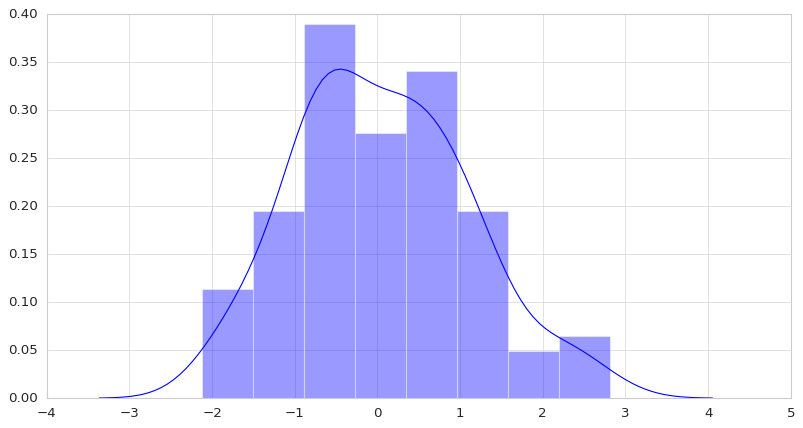

In [31]:
titanic = np.random.normal(size=100)
sns.distplot(titanic)
titanic

In [32]:
titanic

array([-9.66364250e-01, -7.04684495e-01,  3.55095462e-01, -7.07485610e-01,
       -1.08463556e+00,  1.47835312e+00, -8.61889106e-01,  7.45691840e-01,
        6.22562745e-01,  1.02773172e-01,  1.43671686e+00,  1.99260055e+00,
        7.18963387e-01, -6.31736701e-01,  6.23586043e-01,  1.16290236e-01,
        9.36743994e-01,  7.41672625e-02,  9.56021082e-01, -5.72962035e-01,
        6.60372925e-04,  7.81762087e-01,  2.46913490e+00,  5.87136223e-01,
        1.26499891e+00, -3.51071429e-01, -1.05668276e+00, -1.35625210e+00,
       -4.38236401e-01,  2.76042980e-01, -8.63339804e-02,  2.31003990e+00,
       -7.27385404e-01, -1.70223285e+00,  1.13337196e+00,  3.95554240e-01,
       -1.51330669e+00,  6.22574905e-01,  1.98438275e-01, -9.59947751e-02,
       -3.79465987e-01, -2.12198833e+00,  1.32928892e+00,  2.31755792e+00,
       -6.68150866e-01,  1.08648326e+00, -9.22466077e-01,  2.09114337e+00,
       -7.42862314e-01,  8.70049289e-01,  1.43043694e+00, -1.35824574e-02,
       -6.58447409e-01, -

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

In [41]:
a = titanic['Age']


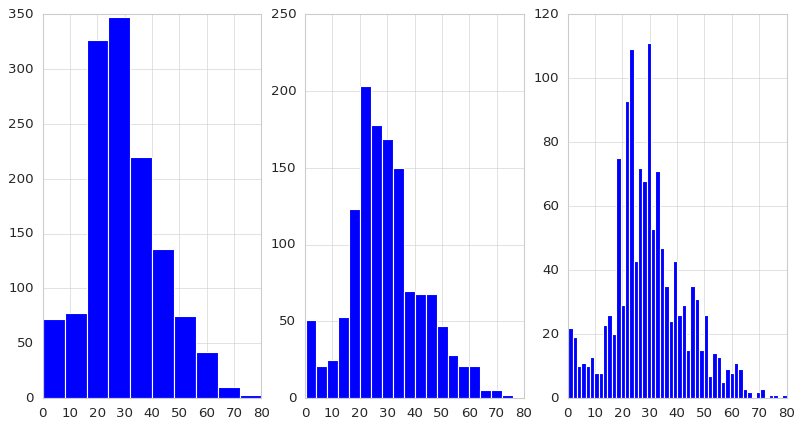

In [42]:
# your code here
plt.subplot(1,3,1)
a.hist(bins = 10)
plt.subplot(1,3,2)
a.hist(bins=20)
plt.subplot(1,3,3)
a.hist(bins=50)

#### Whether the bin size affects your plot? Why?

In [ ]:
#your comment here


#### Use seaborn to show the distribution of the column `Age`

In [9]:
# your code here
sns.distplot(titanic('Age'))


TypeError: 'numpy.ndarray' object is not callable

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

In [ ]:
# your code here- 1st way


In [ ]:
# your code here- 2nd way


#### Use the appropriate plot to visualize the column `Pclass` 


In [ ]:
# your code here


#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [ ]:
# your code here


#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [ ]:
#your code here


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [ ]:
#your code-1st way


In [ ]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [ ]:
#your code here


#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [ ]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [ ]:
#your code here
